# Budapest Weather 2000-2020 analysis

#### Data Source: 
https://darksky.net/dev



#### Data Description: 
https://darksky.net/dev/docs  
Data is in SI units as follows:

* summary: Any summaries containing temperature or snow accumulation units will have their values in degrees
  Celsius or in centimeters (respectively).
* nearestStormDistance: Kilometers.
* precipIntensity: Millimeters per hour.
* precipIntensityMax: Millimeters per hour.
* temperature: Degrees Celsius.
* temperatureMin: Degrees Celsius.
* temperatureMax: Degrees Celsius.
* apparentTemperature: Degrees Celsius.
* dewPoint: Degrees Celsius.
* windSpeed: Meters per second.
* windGust: Meters per second.
* pressure: Hectopascals.
* visibility: Kilometers.

In [11]:
import glob
import time
from datetime import datetime
from pathlib import Path

import numpy as np
import pandas as pd
import os

In [12]:
IN_DIR = Path("/home/xunguist/Budapest_idojaras_2010-2020/BP_years")

## Read and parse raw data

#### Create custom parsers and define datetime columns

In [241]:
def custom_date_parser(x: str) -> datetime:
    ""
    try:
        x = datetime.strptime(x, "%Y-%m-%d %H:%M")
        return x
    except TypeError:
        return np.NaN
    
def custom_int_parser(x: str) -> int:
    ""
    try:
        x = np.int64(x)
        return x
    except (TypeError,ValueError):
        return np.NaN

datetime_cols = ["time", "sunriseTime", "temperatureLowTime",
                 "precipIntensityMaxTime", "temperatureHighTime",
                 "apparentTemperatureHighTime", "apparentTemperatureLowTime",
                 "temperatureMinTime", "temperatureMaxTime",
                 "apparentTemperatureMinTime", "apparentTemperatureMaxTime"]

####  Iterate over INDIR and collect data into a single pd dataframe

In [242]:
all_years = pd.DataFrame()

for file in IN_DIR.glob("*.csv"):
    year_df = pd.read_csv(file, 
                          parse_dates=datetime_cols,
                          date_parser=custom_date_parser,
                          converters={"uvIndex":custom_int_parser})
    all_years = all_years.append(year_df)

In [243]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7669 entries, 0 to 365
Data columns (total 37 columns):
Unnamed: 0                     7669 non-null int64
time                           7669 non-null datetime64[ns]
summary                        7420 non-null object
sunriseTime                    7669 non-null datetime64[ns]
moonPhase                      7669 non-null float64
precipIntensity                5089 non-null float64
precipIntensityMax             5089 non-null float64
precipIntensityMaxTime         1870 non-null datetime64[ns]
precipProbability              5088 non-null float64
precipType                     3721 non-null object
temperatureHigh                7664 non-null float64
temperatureHighTime            7664 non-null datetime64[ns]
temperatureLow                 7666 non-null float64
temperatureHigh.1              7664 non-null float64
temperatureLowTime             7666 non-null datetime64[ns]
apparentTemperatureHigh        7664 non-null float64
apparentTempera

####  Rename, cast, drop and reindex

In [244]:
all_years.rename({"time":"date"}, 
                 axis=1, 
                 inplace=True)
all_years.loc[:,"date"] = pd.to_datetime(all_years["date"])
all_years.loc[:,"sunriseTime"] = pd.to_datetime(all_years["sunriseTime"])
all_years.loc[:,"temperatureHighTime"] = pd.to_datetime(all_years["temperatureHighTime"])
all_years.loc[:,"temperatureLowTime"] = pd.to_datetime(all_years["temperatureLowTime"])

all_years.loc[:,"year"] = all_years["date"].dt.year
all_years.loc[:,"month"] = all_years["date"].dt.month
all_years.loc[:,"day"] = all_years["date"].dt.day
all_years.loc[:,"dayofweek"] = all_years["date"].dt.dayofweek

all_years.drop(["Unnamed: 0", "temperatureHigh.1"], 
               axis=1, 
               inplace=True)

all_years.index = all_years["date"].dt.strftime("%Y-%m-%d")

In [245]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669 entries, 2000-01-01 to 2020-12-31
Data columns (total 39 columns):
date                           7669 non-null datetime64[ns]
summary                        7420 non-null object
sunriseTime                    7669 non-null datetime64[ns]
moonPhase                      7669 non-null float64
precipIntensity                5089 non-null float64
precipIntensityMax             5089 non-null float64
precipIntensityMaxTime         1870 non-null datetime64[ns]
precipProbability              5088 non-null float64
precipType                     3721 non-null object
temperatureHigh                7664 non-null float64
temperatureHighTime            7664 non-null datetime64[ns]
temperatureLow                 7666 non-null float64
temperatureLowTime             7666 non-null datetime64[ns]
apparentTemperatureHigh        7664 non-null float64
apparentTemperatureHighTime    7664 non-null datetime64[ns]
apparentTemperatureLowTime     7666 non-null dat

#### Check for missing data 

In [18]:
null_df = pd.DataFrame(all_years.isnull().sum(), columns=["null count"])
null_df["null %"] = round(null_df["null count"] / len(all_years)*100, 2)
null_df.sort_values(by="null count", ascending=False)

,null count,null %
ozone,7056,92.01
precipIntensityMaxTime,5799,75.62
precipType,3948,51.48
visibility,2887,37.65
precipProbability,2581,33.65
precipIntensity,2580,33.64
precipIntensityMax,2580,33.64
windGust,2407,31.39
pressure,356,4.64
summary,249,3.25


#### Drop columns where above 50% is missing

In [19]:
all_years.drop(['precipType', 'ozone','precipIntensityMaxTime'], 
               axis=1,
               inplace=True)

### Extreme Weather

#### Highest Temperature max

In [192]:
all_years[all_years["temperatureMax"] == all_years["temperatureMax"].max()][["temperatureMax"]]

,temperatureMax
date,
2007-07-20,40.44


In [198]:
temperatureMax_mean = round(all_years["temperatureMax"].mean(), 1)
temperatureMax_mean

16.4

#### Lowest Temperature low

In [193]:
all_years[all_years["temperatureMin"] == all_years["temperatureMin"].min()][["temperatureMin"]]

,temperatureMin
date,
2003-01-13,-20.61


In [200]:
temperatureMin_mean = round(all_years["temperatureMin"].mean(), 1)
temperatureMin_mean

7.2

#### Highest windSpeed (m/s)

In [191]:
all_years[all_years["windSpeed"] == all_years["windSpeed"].max()][["windSpeed"]]

,windSpeed
date,
2018-10-24,9.66


In [201]:
windSpeed_mean = round(all_years["windSpeed"].mean(), 1)
windSpeed_mean

2.3

### Plotting data

In [222]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


## Comparing same periods of different years

In [257]:
all_years["month_day"] = \
all_years["date"].dt.month.astype(str) \
+ "." + all_years["date"].dt.day.astype(str)

In [313]:
from_period = '2000-06-01'
to_period = '2000-08-31'

In [312]:
sommer_2000 = all_years[from_period: to_period].copy()
sommer_2020 = all_years[from_period: to_period].copy()

#### Comparing Temperature Highs

In [288]:
sommer_2000["temperatureHigh_average"] = \
(sommer_2000["temperatureHigh"] + sommer_2000["temperatureLow"]) / 2
sommer_2020["temperatureHigh_average"] = \
(sommer_2020["temperatureHigh"] + sommer_2020["temperatureLow"]) / 2

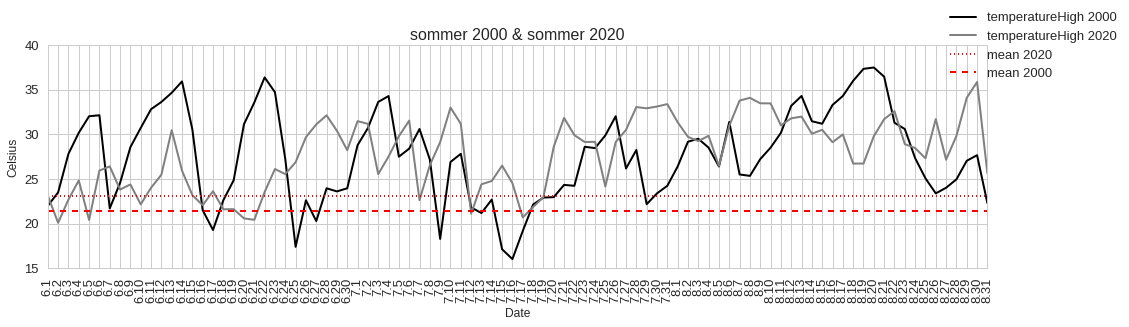

In [304]:
fig = plt.figure(figsize=(15,4))
ax = plt.axes()
ax.plot(sommer_2000["month_day"],
        sommer_2000["temperatureHigh"][:], 
         '-', 
         color='black',
         label='temperatureHigh 2000'
        )
ax.plot(sommer_2020["month_day"],
        sommer_2020["temperatureHigh"][:], 
         '-', 
         color='grey',
         label='temperatureHigh 2020'
        )

ax.plot([sommer_2020["temperatureHigh_average"].mean()] * len(sommer_2020),
        ":",
        color='red',
        label='mean 2020')

ax.plot([sommer_2000["temperatureHigh_average"].mean()] * len(sommer_2000),
        "--",
        color='red',
        label='mean 2000')

ax.tick_params(axis='x', rotation=90)

ax.set(title=f"sommer 2000 & sommer 2020",
       xlabel='Date', 
       ylabel='Celsius')


ax.legend(bbox_to_anchor=(1.15, 1.2))

#### Comparing Temperature Lows

In [ ]:
sommer_2000["temperatureLow_average"] = \
(sommer_2000["temperatureLow"] + sommer_2000["temperatureLow"]) / 2
sommer_2020["temperatureLow_average"] = \
(sommer_2020["temperatureLow"] + sommer_2020["temperatureLow"]) / 2

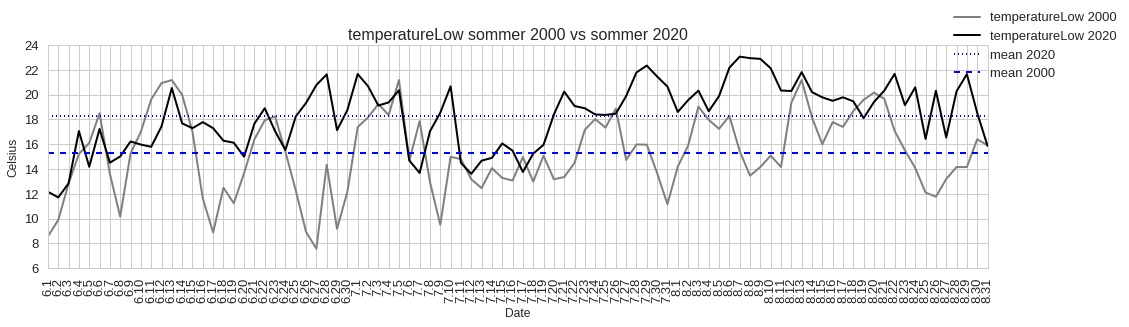

In [301]:
fig = plt.figure(figsize=(15,4))
ax = plt.axes()
ax.plot(sommer_2000["month_day"],
        sommer_2000["temperatureLow"][:], 
         '-', 
         color='grey',
         label='temperatureLow 2000'
        )
ax.plot(sommer_2020["month_day"],
        sommer_2020["temperatureLow"][:], 
         '-', 
         color='black',
         label='temperatureLow 2020'
        )

ax.plot([sommer_2020["temperatureLow_average"].mean()] * len(sommer_2020),
        ":",
        color='blue',
        label='mean 2020')

ax.plot([sommer_2000["temperatureLow_average"].mean()] * len(sommer_2000),
        "--",
        color='blue',
        label='mean 2000')

ax.tick_params(axis='x', rotation=90)

ax.set(title=f"temperatureLow sommer 2000 vs sommer 2020",
       xlabel='Date', 
       ylabel='Celsius')


ax.legend(bbox_to_anchor=(1.15, 1.2))

## TODO

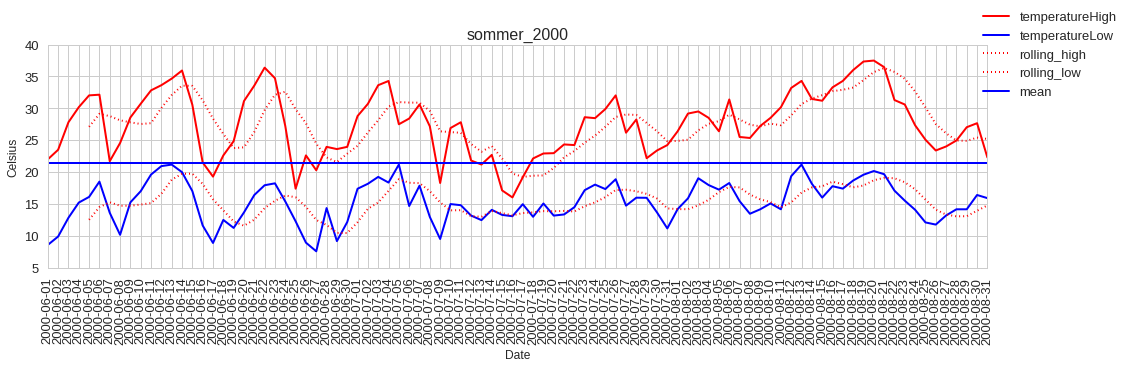

In [296]:
rolling_days = 5
days = 50

fig = plt.figure(figsize=(15,4))
ax = plt.axes()
ax.plot(sommer_2000["temperatureHigh"][:], 
         '-', 
         color='red',
         label='temperatureHigh'
        )
ax.plot(sommer_2000["temperatureLow"][:], 
         '-', 
         color='blue',
         label='temperatureLow'
        )

ax.plot(sommer_2000["rolling_high"][:], 
         ':',
         color='red',
         label='rolling_high'
        )

ax.plot(sommer_2000["rolling_low"][:], 
         ':', 
         color='red',
         label='rolling_low'
        )

ax.plot([sommer_2000["average"].mean()] * len(sommer_2000),
        "-",
        color='blue',
        label='mean 2000')

ax.tick_params(axis='x', rotation=90)

ax.set(title=f"sommer_2000",
       xlabel='Date', 
       ylabel='Celsius')


ax.legend(bbox_to_anchor=(1.15, 1.2))

/home/xunguist/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


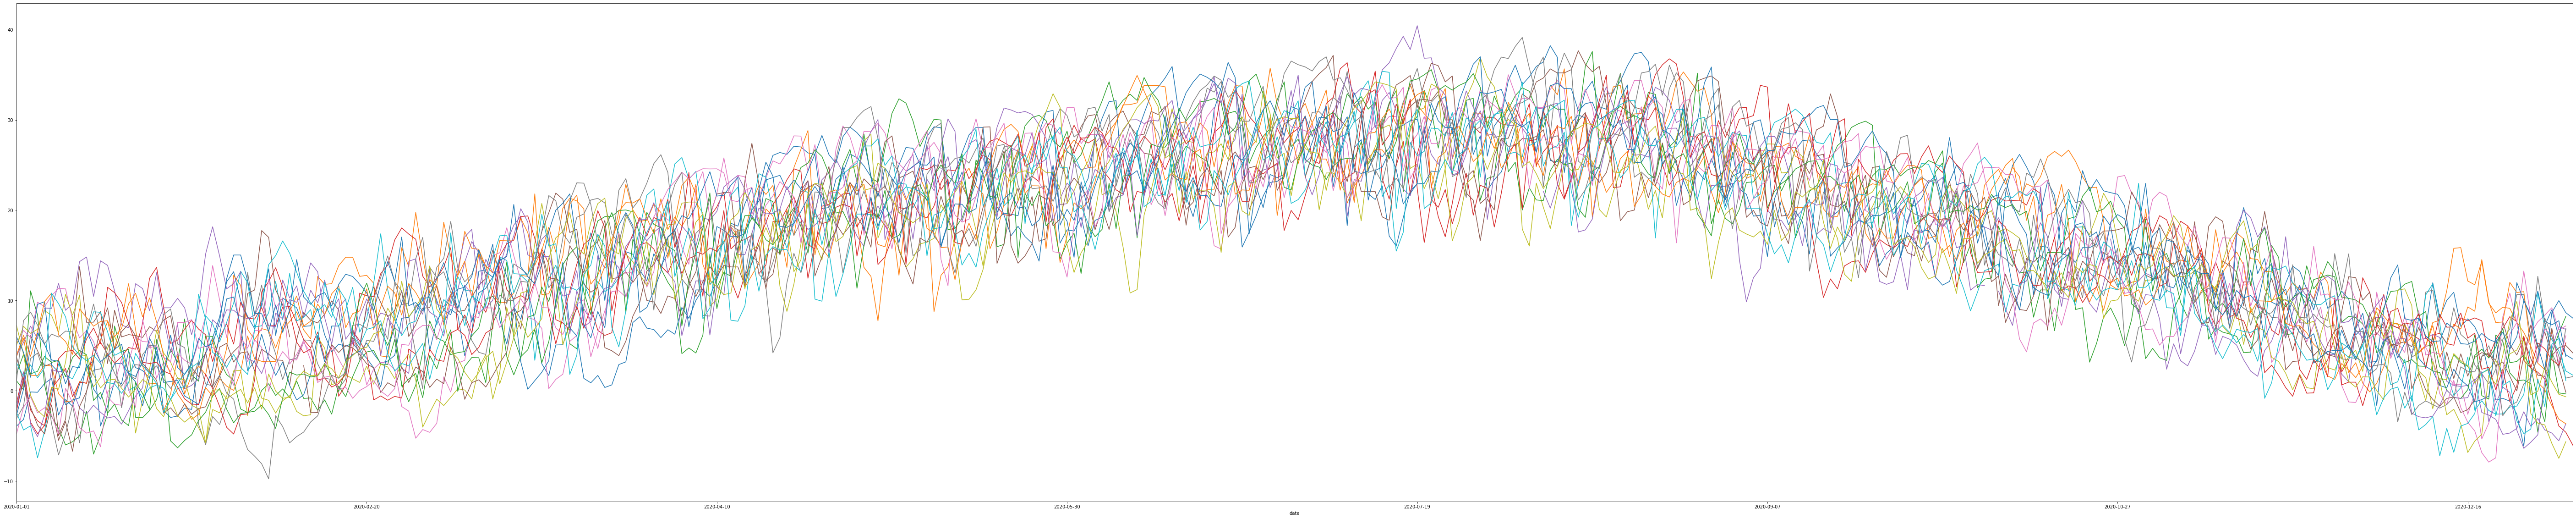

In [11]:
for year in all_years["year"].unique():
    all_years[all_years["year"] == year]["temperatureHigh"].plot(figsize=(100,20))
    #ax = all_years[all_years["year"] == year]["temperatureHigh"].plot(figsize=(100,20))
    
#fig = ax.get_figure()
#fig.savefig(IN_DIR/'windSpeed_figure.pdf')

In [12]:
#More to come